In [8]:
%matplotlib inline
import sys
sys.path.append('..')
from autodiff import *
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import numpy as np

In [9]:
from fractals import *

In [77]:
def difference(f, z, diff_method = "AD", max_iters=50, alpha=1):
    for i in range(max_iters):
        f(x=z)
        if diff_method == "AD":
            derivative = f.derivative()["x"]
        elif diff_method == "Finite":
            derivative = finite_difference(f,z)
        zplus = z - alpha*f.value()/derivative
    return zplus - z

def difference_grid(f, size, area, diff_method="AD", e=1e-3, max_iters=50, alpha=1, ):
    # Parameters
    roots = []
    ((x_min, x_max), (y_min, y_max)) = area
    (x_size, y_size) = size
    
    # Outputs
    grid_diff = np.zeros((y_size, x_size))
    
    # Grid calculations over complex plane
    for y in (range(y_size)):
        z_y = y * (y_max - y_min)/(y_size - 1) + y_min
        for x in range(x_size):
            z_x = x * (x_max - x_min)/(x_size - 1) + x_min
            diff = difference(f, complex(z_x, z_y), diff_method, max_iters)
            grid_diff[y,x] = diff
                
    return grid_diff


/Users/jaemincheun/Documents/harvard/CS207/cs207-FinalProject/examples/fractals.py:76: RuntimeWarning: invalid value encountered in true_divide
  scaled = grid_iter/np.max(grid_iter)


IndexError: too many indices for array

<Figure size 432x288 with 0 Axes>

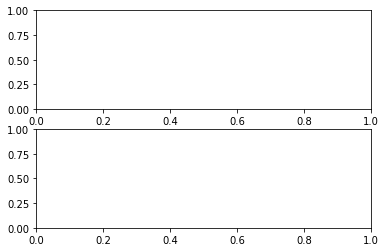

In [7]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
# max_iters = 40
alpha = 1
iter_list = [1]
x = Variable('x')
f = x**3 - 1
fig = plt.figure()
fig, ax_list = plt.subplots(2,len(iter_list))
for idx, max_iters in enumerate(iter_list):
    grid_root, grid_iter, roots = fractal_grid(f, size, area, "AD", e, max_iters, alpha)
    image = grid_to_image(grid_root,grid_iter,roots)
    cmap = plt.get_cmap("nipy_spectral")
    ax_list[0,idx].imshow(image, cmap=cmap)
for idx, max_iters in enumerate(iter_list):
    grid_root, grid_iter, roots = fractal_grid(f, size, area, "Finite", e, max_iters, alpha)
    image = grid_to_image(grid_root,grid_iter,roots)
    cmap = plt.get_cmap("nipy_spectral")
    ax_list[1,idx].imshow(image, cmap=cmap)

In [178]:
def log_and_scale(image):
    result = [[np.log(j) for j in k] for k in image]
    max_value = np.max(result)
    result = [[j * 255.0/max_value for j in k] for k in result]
    return result

<Figure size 432x288 with 0 Axes>

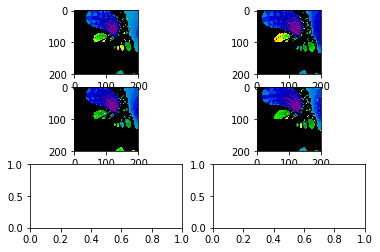

In [189]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
# max_iters = 40
alpha = 1
iter_list = np.arange(10,12)
x = Variable('x')
f = x**(complex(3,4)) - 4 
fig = plt.figure()
fig, ax_list = plt.subplots(3,len(iter_list))
for idx, max_iters in enumerate(iter_list):
    grid_root, grid_iter, roots = fractal_grid(f, size, area, "AD", e, max_iters, alpha)
    image = grid_to_image(grid_root,grid_iter,roots)
    cmap = plt.get_cmap("nipy_spectral")
    ax_list[0,idx].imshow(image, cmap=cmap)
    
    grid_root, grid_iter, roots = fractal_grid(f, size, area, "Finite", e, max_iters, alpha)
    image = grid_to_image(grid_root,grid_iter,roots)
    cmap = plt.get_cmap("nipy_spectral")
    ax_list[1,idx].imshow(image, cmap=cmap)
    
#     grid_diff_AD = difference_grid(f, size, area, "AD", e, max_iters, alpha)
#     grid_diff_FINITE = difference_grid(f, size, area, "Finite", e, max_iters, alpha)
#     diff = abs(grid_diff_AD - grid_diff_FINITE)
#     diff = log_and_scale(diff)
#     ax_list[2, idx].imshow(diff, cmap="Greys")

In [ ]:
size = (200,200)
area = ((-1,1), (-1,1))
e = 1e-3
# max_iters = 40
alpha = 1
iter_list = np.arange(1,3)
x = Variable('x')
f = x**3 - 1
fig = plt.figure()
fig, ax_list = plt.subplots(1,len(iter_list))
for idx, max_iters in enumerate(iter_list):
    grid_diff_AD = difference_grid(f, size, area, "AD", e, max_iters, alpha)
    grid_diff_FINITE = difference_grid(f, size, area, "Finite", e, max_iters, alpha)
    diff = abs(grid_diff_AD - grid_diff_FINITE)
    diff = log_and_scale(diff)
    ax_list[idx].imshow(diff, cmap=cmap)

In [ ]:
def grid_to_image_bw(grid):
    

In [46]:
print(np.mean(sum(grid_iter)))

1219.67


In [9]:
# Uses matplotlib cmap
def grid_to_image_2(grid_root, grid_iter, roots, cmap):
    idxs = np.linspace(0,255,len(roots),dtype=int)
    img = np.zeros((*grid_root.shape,3))
    
    grid_iter = np.log(grid_iter)
    scaled = grid_iter/np.max(grid_iter)
    
    for i in range(len(roots)):
        color = cmap(idxs[i])
        for j in range(3):
            img[grid_root==(i+1),j] = color[j]
    
    img = img*scaled[...,np.newaxis]
    return img

def grid_to_image(grid_root, grid_iter, roots):
    img = np.zeros((grid_root.shape))
    idxs = np.linspace(0,255,len(roots),dtype=int)
    
#     grid_iter = np.log(grid_iter)
    scaled = grid_iter/np.max(grid_iter)
    
    shift = scaled*(256/4)
    
    for i in range(len(roots)):
        img[grid_root==i+1] = idxs[i]+shift[grid_root==i+1]
#         img[grid_root==i+1] = idxs[i]
    
    return img
    

# cmap = plt.get_cmap("nipy_spectral")
# image = grid_to_image(grid_root,grid_iter,roots)
# plt.imshow(image, cmap=cmap)

In [10]:
import matplotlib.animation as animation
# Save video
def save_video(frames, filename, cmap, display=True):
    fig = plt.figure()
    ims = []
    for i in range(len(frames)):
        im = plt.imshow(frames[i], cmap=cmap, animated=True)
        ims.append([im])
        
    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
    if display:
        plt.show()
    ani.save(filename)

In [13]:
size = (500,500)
area = ((-1,1), (-1,1))
e = 1e-3
max_iters = 40
alpha = 1

x = Variable('x')
f = x**3 - 1

images = []
for alpha in np.linspace(0.5,1.5,30):
    print(alpha)
    grid_root, grid_iter, roots = fractal_grid(f, size, area, e, max_iters, alpha)
    images.append(grid_to_image(grid_root,grid_iter,roots))

0.5


KeyboardInterrupt: 

In [12]:
save_video(images, 'fractals_are_cool.mp4', cmap)

NameError: name 'images' is not defined

In [11]:
for idx, image in enumerate(images):
    plt.imsave('%d.jpg' % idx, image, cmap=cmap)

NameError: name 'images' is not defined

In [ ]:
cmap = plt.get_cmap("nipy_spectral")
save_video(images, "test.mp4", cmapw)

In [ ]:
import autodiff as AD
from PIL import Image

x_min, x_max = -1.0, 1.0

y_min, y_max = -1.0, 1.0

colors = [\
(180, 0, 30), (0, 180, 30), (0, 30, 180), \
(0, 190, 180), (180, 0, 175), (180, 255, 0), \
(155, 170, 180), (70, 50, 0), (255, 255, 255)]

max_iters = 50
epsilon = 1e-3

def newtons_method(f, z):
   # Fourty iterations for safe measure
    for i in range(max_iters):
        f(x=z)
        zplus = z - f.value()/f.derivative()["x"]
        # Checks for convergence
        if abs(zplus - z) < e:
            return z
        z = zplus

    return None

# Draws the functions
def draw(f, fmg, size, img_name):
    roots = []
    for y in range(size):
        z_y = y * (y_max - y_min)/(size - 1) + y_min
        for x in range(size):
            z_x = x * (x_max - x_min)/(size - 1) + x_min
            root = newtons_method(f, complex(z_x, z_y))
            if root:
                flag = False
                for test_root in roots:
                    if abs(test_root - root) < 10e-3:
                        root = test_root
                        flag = True
                        break
                if not flag:
                    roots.append(root)
            if root:
                img.putpixel((x, y), colors[roots.index(root)])
    print(roots)
    img.save(img_name, "PNG")
 
size = 256
img = Image.new("RGB", (size, size), (255, 255, 255))
x = AD.Variable("x")
draw(x**3 - 1, img, size, "fig1.png");
draw(x**2 - 2*x + 2, img, size, "fig2.png");
draw(x**6 - x**3 + 2, img, size, "fig3.png");
draw(x**3 - 2*x + 2, img, size, "fig3.png");
draw(x**5 - x, img, size, "fig4.png")

In [ ]:
for i in range(1,5):
    print(i)
    display(Image.open(f'fig{i}.png'))